**Course website**: http://lagex.github.io/geofisica2

**Note**: This notebook is part of the course "Geofísica 2" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Esse documento que você está usando é um [IPython notebook](http://ipython.org/notebook.html). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (que pode ser números, texto, figuras, videos, etc).

# Prática 4 - Refração crítica

Vamos estudar o que acontece quando uma onda P incide em uma interface com diferentes ângulos. Estamos particularmente interessados nas ondas que incidem com o **ângulo crítico**. Para esse ângulo, as ondas são transmitidas com ângulo de $90^\circ$ e viajam ao longo da interface.

Para isso, vamos utilizar as simulações de ondas da biblioteca [Fatiando a Terra](http://www.fatiando.org). Essas simulações utilizam o [método de diferenças finitas](http://en.wikipedia.org/wiki/Finite_difference_method) para calcular soluções da equação da onda.

As tarefas abaixo acompanham as questões que vocês devem responder. Usem as simulações abaixo para te ajudar a responder as perguntas.

## Preparação

Rode a célula abaixo para carregar as componentes necessárias para fazer as simulações. Não se preocupe se aparecer um `:0: FutureWarning: IPython widgets are experimental and may change in the future.` abaixo. Isso é consequência de utilizar tecnologia de ponta.

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from fatiando import utils
from fatiando.seismic.wavefd import Ricker, ElasticPSV, ElasticSH
from fatiando.vis import mpl
import fatiando

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
print(fatiando.__version__)

0.3-224-gb6a56f8


## Simulação da refração

Vamos fazer uma simulação de ondas P (na verdade são SH, vamos vocês já entenderam a diferença). Nessa simulação vamos propagar uma onda por um meio com 1 camada plana acima de um meio semi-infinito.

Rode as células abaixo para criar a simulação.

In [41]:
shape = (300, 1000)
spacing = 10
extent = [0, shape[1]*spacing, shape[0]*spacing, 0]
densidade = np.ones(shape)*1800
velocidade = np.ones(shape)*3000
l1 = 100
densidade[l1:,:] = 2400
velocidade[l1:,:] = 5000

In [23]:
sim = ElasticSH(velocidade, densidade, spacing=spacing, taper=0.002, padding=80)
sim.add_point_source((0, shape[1]//5), Ricker(5, 20, 1/20))

Rode a célula abaixo para executar a simulação. **Essa simulação é demorada**.

In [31]:
sim.run(2500)

|##################################################|100% Ran 500 iterations in 23.5154 seconds.

Rode as duas células abaixo para explorar a simulação gerar uma animação.

In [32]:
sim.animate(every=20, embed=True, dpi=70, fps=10, cutoff=0.0002, cmap="Greys")

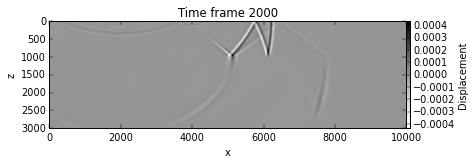

In [36]:
sim.explore(every=50, cmap="Greys")

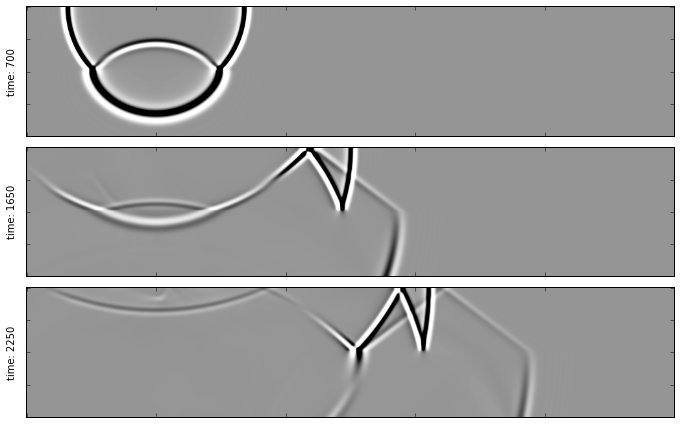

In [88]:
fig, axes = mpl.subplots(3, 1, figsize=(10, 6))
ax = axes[0]
area = (0, shape[1]*spacing, shape[0]*spacing, 0)
ax.imshow(sim[700][:200], cmap='Greys', vmin=-0.0001, vmax=0.0001)
ax.set_ylabel('time: 700')
ax = axes[1]
ax.imshow(sim[1450][:200], cmap='Greys', vmin=-0.0001, vmax=0.0001)
ax.set_ylabel('time: 1650')
ax = axes[2]
ax.imshow(sim[2000][:200], cmap='Greys', vmin=-0.0001, vmax=0.0001)
ax.set_ylabel('time: 2250')
for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
mpl.tight_layout()
mpl.savefig('refraction-time-snapshots.png')